# Prosper Loan Data Exploration
## by Meng Wang

## Preliminary Wrangling

> There is a dataset related to loans during 2007-2014. There are 113937 loans and 81 variables including term, date, APR and information about the borrowers such as income range and available bank card credit when open the current loan. We'll pick up around 10 variables to do further analysis and see what's affecting borrower APR.

In [71]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [72]:
loan=pd.read_csv('prosperLoanData.csv')

In [73]:
print(loan.head())
print(loan.dtypes)
print(loan.shape)

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

In [74]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [75]:
# It seems the '$0' in IncomeRange is not accurate, so we can drop these data.


In [76]:
# convert LoanStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)',
                                   'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                                  'Past Due (>120 days)','Defaulted','Chargedoff','Cancelled'],
                    'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', 
                                    '$1-24,999', '$0', 'Not employed','Not displayed'],
                   'Term':[12,36,60]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [77]:
print(loan.LoanStatus.value_counts())
print(loan.ProsperScore.value_counts())
print(loan.IncomeRange.value_counts())


Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


In [78]:
print(loan.LoanStatus.dtype)
print(loan.ProsperScore.dtype)
print(loan.IncomeRange.dtype)

category
float64
category


### What is the structure of your dataset?

> There are 113,937 loans in the dataset and 81 variables. There are many numeric variables and also the dataset contains a few date time, categorical and ordinal variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting `BorrowerAPR` and `LoanStatus`. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are two categorical variables that I want to dig into: `LoanStatus` and `IncomeRange`. 

> Also, `DebtToIncomeRatio`, `MonthlyLoanPayment`, `Term`

> The credit lines(3 variables,`CurrentCreditLines`,`OpenCreditLines`,`TotalCreditLinespast7years`), 

> Revolving(`OpenRevolvingAccounts`,`OpenRevolvingMonthlyPayment`,`RevolvingCreditBalance`,`BankcardUtilization`), 

> Inqueries(2 variables,`InquiriesLast6Months`,`TotalInquiries`),

> Delinquencies `DelinquenciesLast7Years`) 

> And `AvailableBankcardCredit` may all affect `BorrowerAPR` and `LoanStatus`.

## Univariate Exploration


I'll start by looking at the distribution of `BorrowerAPR`.

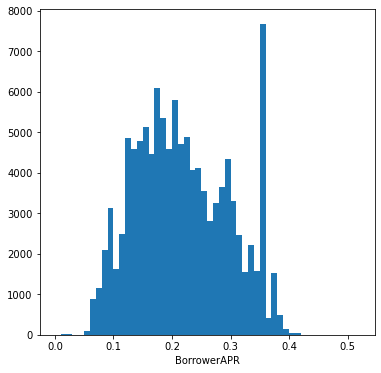

In [79]:
binsize=0.01
bins=np.arange(0,max(loan.BorrowerAPR)+binsize,binsize)
plt.figure(figsize=[6,6])
plt.hist(data=loan,x='BorrowerAPR',bins=bins)
plt.xlabel('BorrowerAPR')
plt.show()

The BorrowerAPR distribution looks bimodal,with the first peak 0.1-0.2 and second peak(even more) 0.34-0.4. Most of the loan APRs are in 0.1-0.3, but the second peak is an exception and need more attention.

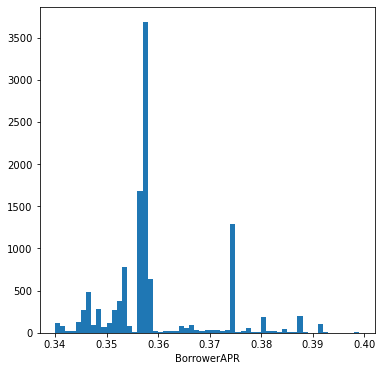

In [11]:
# take a closer look at the second peak
binsize=0.001
bins=np.arange(0.34,0.4,binsize)
plt.figure(figsize=[6,6])
plt.hist(data=loan,x='BorrowerAPR',bins=bins)
plt.xlabel('BorrowerAPR')
plt.show()

In [12]:
loan['Term']

0         36
1         36
2         36
3         36
4         36
          ..
113932    36
113933    36
113934    60
113935    60
113936    36
Name: Term, Length: 113316, dtype: category
Categories (3, int64): [12 < 36 < 60]

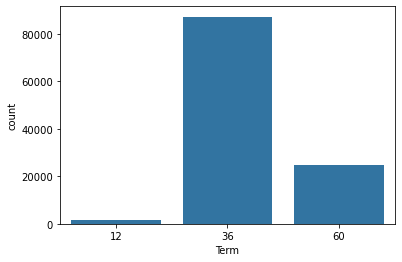

In [13]:
# Term

default_color = sb.color_palette()[0]
sb.countplot(data=loan,x='Term',color=default_color);
plt.show()



In [14]:
loan['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

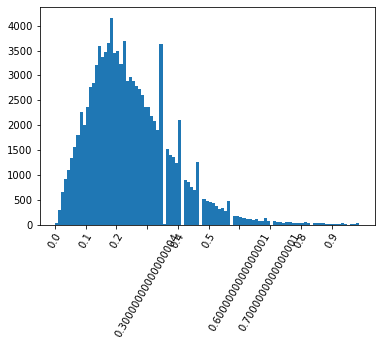

In [15]:
# a few data has ratio>1
bins=np.arange(0,1,0.01)
bin_tick=np.arange(0,1,0.1)
plt.hist(data=loan,x='DebtToIncomeRatio',bins=bins);
plt.xticks(bin_tick,bin_tick,rotation=60);

# question:how to format the xticks to be two decimal..?

In [16]:
loan['MonthlyLoanPayment'].describe()

count    113316.000000
mean        272.503234
std         192.277956
min           0.000000
25%         131.780000
50%         218.150000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

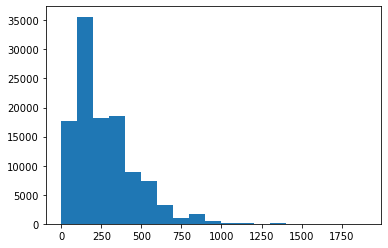

In [17]:
bins=np.arange(0,2000,100)
plt.hist(data=loan,x='MonthlyLoanPayment',bins=bins);

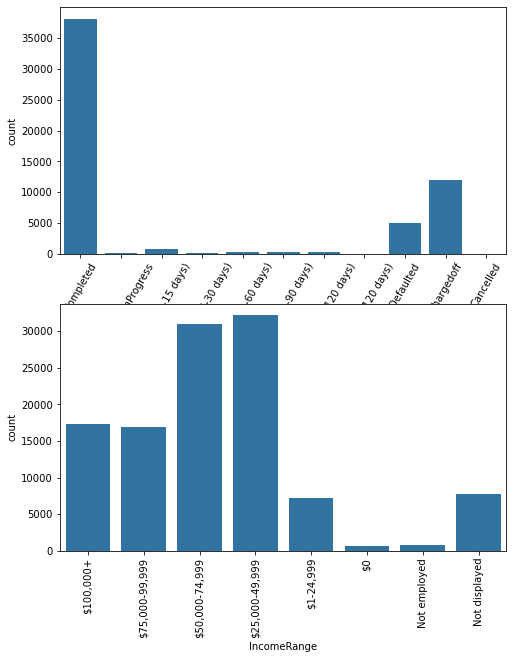

In [80]:
# let's plot two categorical variables together.

fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = default_color, ax = ax[0]);

sb.countplot(data = loan, x = 'IncomeRange', color = default_color, ax = ax[1]);
ax[0].set_xticklabels(['Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)',
                                   'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                                  'Past Due (>120 days)','Defaulted','Chargedoff','Cancelled'],rotation=60)
ax[1].set_xticklabels(['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', 
                                    '$1-24,999', '$0', 'Not employed','Not displayed'],rotation=90)
plt.show()


Clearly, for LoanStatus, 'completed' is the most, and the second most common loan status is 'defaulted', and then 'past due for 1-15 days'.
For IncomeRange, '25,000-49,999' is the most common and followed by '50,000-74,999'.

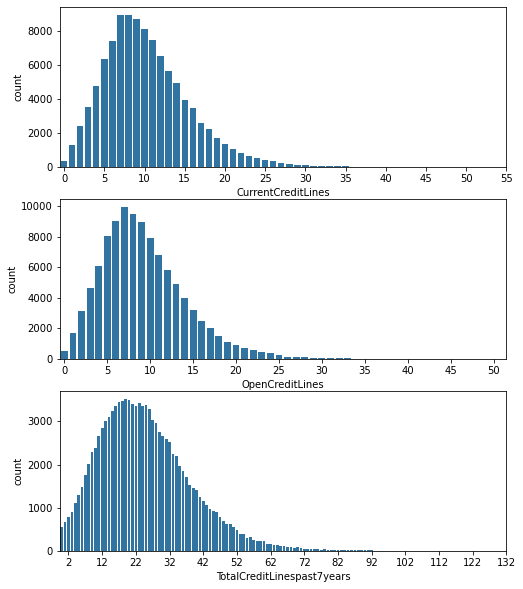

In [19]:
# The credit lines

fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]

sb.countplot(data = loan, x = 'CurrentCreditLines', color = default_color, ax = ax[0]);
bins0=list(np.arange(0,59,5))
ax[0].set_xticks(np.arange(0,59,step=5))
ax[0].set_xticklabels(bins0)

sb.countplot(data = loan, x = 'OpenCreditLines', color = default_color, ax = ax[1]);
bins1=list(np.arange(0,54,5))
ax[1].set_xticks(np.arange(0, 54, step=5))
ax[1].set_xticklabels(bins1)

sb.countplot(data = loan, x = 'TotalCreditLinespast7years', color = default_color, ax = ax[2]);
bins2=list(np.arange(2,136,10))
ax[2].set_xticks(np.arange(2, 136, step=10))
ax[2].set_xticklabels(bins2)
plt.show()

Current Credit lines is almost the same as open credit lines. Total credit lines past 7 years is similar to the distribution of the first two, but larger number. So we'll only use `CurrentCreditLines` later to reflect credit lines factor.

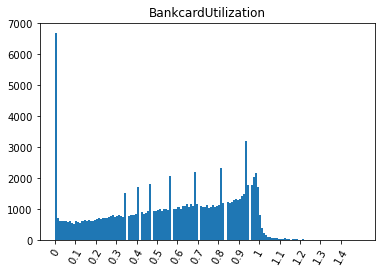

In [20]:
# Bank card utilization
bins=list(np.arange(0,1.5,0.01))
bin_tick=np.arange(0,1.5,0.1)
plt.hist(data=loan,x='BankcardUtilization',bins=bins);
plt.xticks(bin_tick,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],rotation=60)
plt.title('BankcardUtilization')
plt.show()
# why there's percentage that >1? not make sense...

In [81]:
# clean bankcardutilization 
incorrect_Uti=(loan['BankcardUtilization']>1)
loan = loan.loc[-incorrect_Uti,:]

Interestingly, there's a pattern in this plot, the peak appears in several specific utilization ranges such as 0.35,0.4
but we don't know what this represents yet.

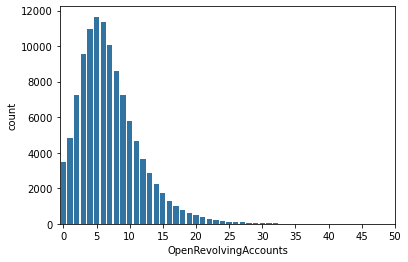

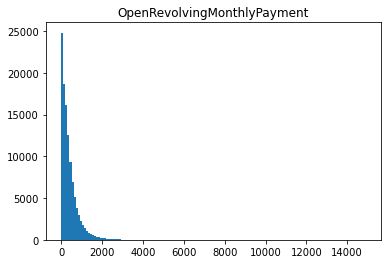

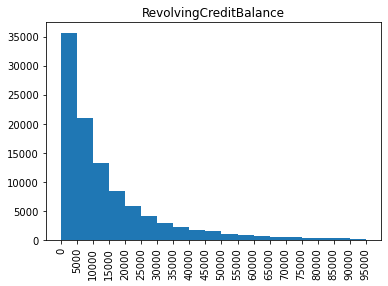

In [22]:
# Revolving

default_color = sb.color_palette()[0]

ax=sb.countplot(data = loan, x = 'OpenRevolvingAccounts', color = default_color);
bins0=list(np.arange(0,51,5))
ax.set_xticks(np.arange(0,51,step=5))
ax.set_xticklabels(bins0)
plt.show()

bins1=list(np.arange(0,14985,100))
plt.hist(data=loan,x='OpenRevolvingMonthlyPayment',bins=bins1);
plt.title('OpenRevolvingMonthlyPayment')
plt.show()

bins2=list(np.arange(0,100000,5000))
plt.hist(data=loan,x='RevolvingCreditBalance',bins=bins2);
plt.xticks(bins2,bins2,rotation=90)
plt.title('RevolvingCreditBalance')
plt.show()

The distribution of `OpenRevolvingAccounts` is similar to the credit line accounts. So just keep one. `OpenRevolvingMonthlyPayment` has a long tail, we may need to filter the data less than 4000 for further analysis. But we still need to pay attention to the long tail because we want to know what affect interest rate, those users may contribute to that question.


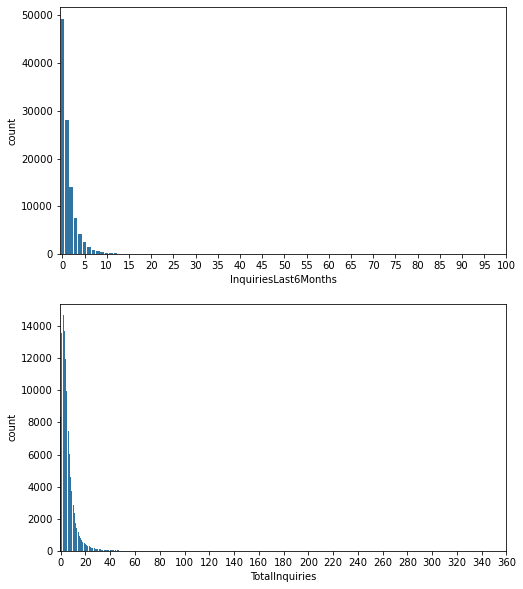

In [23]:
# Inquiries
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = sb.color_palette()[0]
bins0=list(np.arange(0,105,5))
sb.countplot(data = loan, x = 'InquiriesLast6Months', color = default_color, ax = ax[0]);
ax[0].set_xticks(np.arange(0,105,step=5))
ax[0].set_xticklabels(bins0)


sb.countplot(data = loan, x = 'TotalInquiries', color = default_color, ax = ax[1]);

bins1=list(np.arange(0,379,20))
ax[1].set_xticks(np.arange(0, 379, step=20))
ax[1].set_xticklabels(bins1)
plt.show()

In [24]:
loan[loan['InquiriesLast6Months']>loan['TotalInquiries']]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


Two variables related to infquiries have long tails.

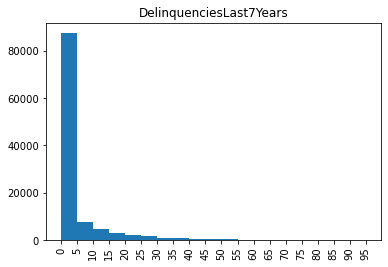

In [25]:
# Delinquencies
bins1=list(np.arange(0,99,5))
plt.hist(data=loan,x='DelinquenciesLast7Years',bins=bins1);
plt.xticks(bins1,bins1,rotation=90)
plt.title('DelinquenciesLast7Years')
plt.show()

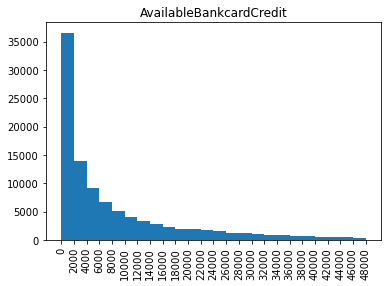

In [26]:
# Available bank card credit
bins2=list(np.arange(0,50000,2000))
plt.hist(data=loan,x='AvailableBankcardCredit',bins=bins2);
plt.xticks(bins2,bins2,rotation=90)
plt.title('AvailableBankcardCredit')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data looks good except there are many BankCardUtilization more than 1. Not sure how it could be possible. For Inquiries and AvailableBankcardCredit, the data ranges are large so we may need to do log transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Drop the data that BankCardUtilization is more than 1. Also, transfered `Term` into ordinal data as there are three value in this variable:12,36,60.

## Bivariate Exploration


Aim: to predict `BorrowerAPR` and `LoanStatus`. 


> Three categorical variables: `LoanStatus`,`IncomeRange` and `Term`

> Other variables: `DebtToIncomeRatio`, `MonthlyLoanPayment`, 

    The credit lines `CurrentCreditLines`, 

    Revolving(`OpenRevolvingMonthlyPayment`,`RevolvingCreditBalance`,`BankcardUtilization`), 

    Inqueries(2 variables,`InquiriesLast6Months`,`TotalInquiries`),

    Delinquencies `DelinquenciesLast7Years`) 

    And `AvailableBankcardCredit` may all affect `BorrowerAPR` and `LoanStatus`.

In [27]:
numeric_vars = ['BorrowerAPR', 'DebtToIncomeRatio', 'MonthlyLoanPayment', 'CurrentCreditLines', 'OpenRevolvingMonthlyPayment',
                'RevolvingCreditBalance', 'BankcardUtilization','InquiriesLast6Months','TotalInquiries','DelinquenciesLast7Years',
               'AvailableBankcardCredit']
categoric_vars = ['LoanStatus', 'IncomeRange', 'Term']

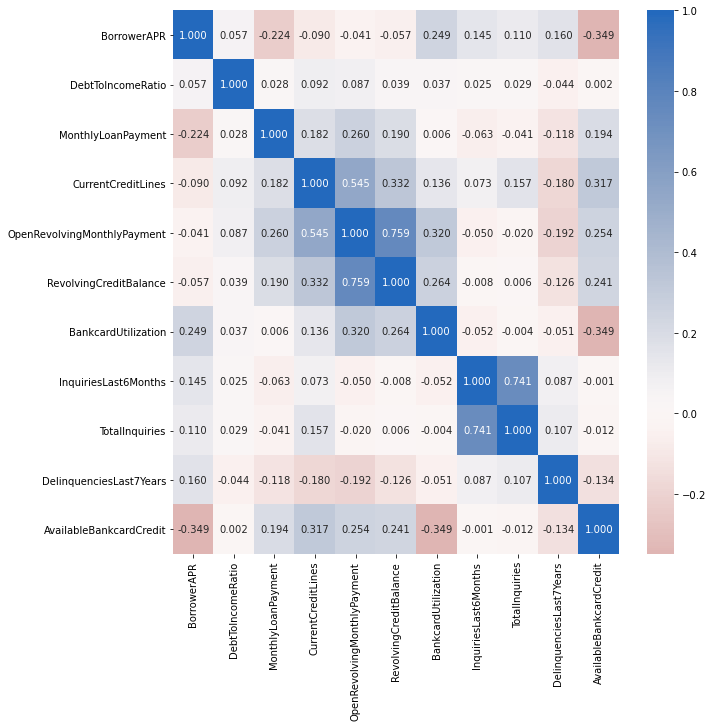

In [28]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

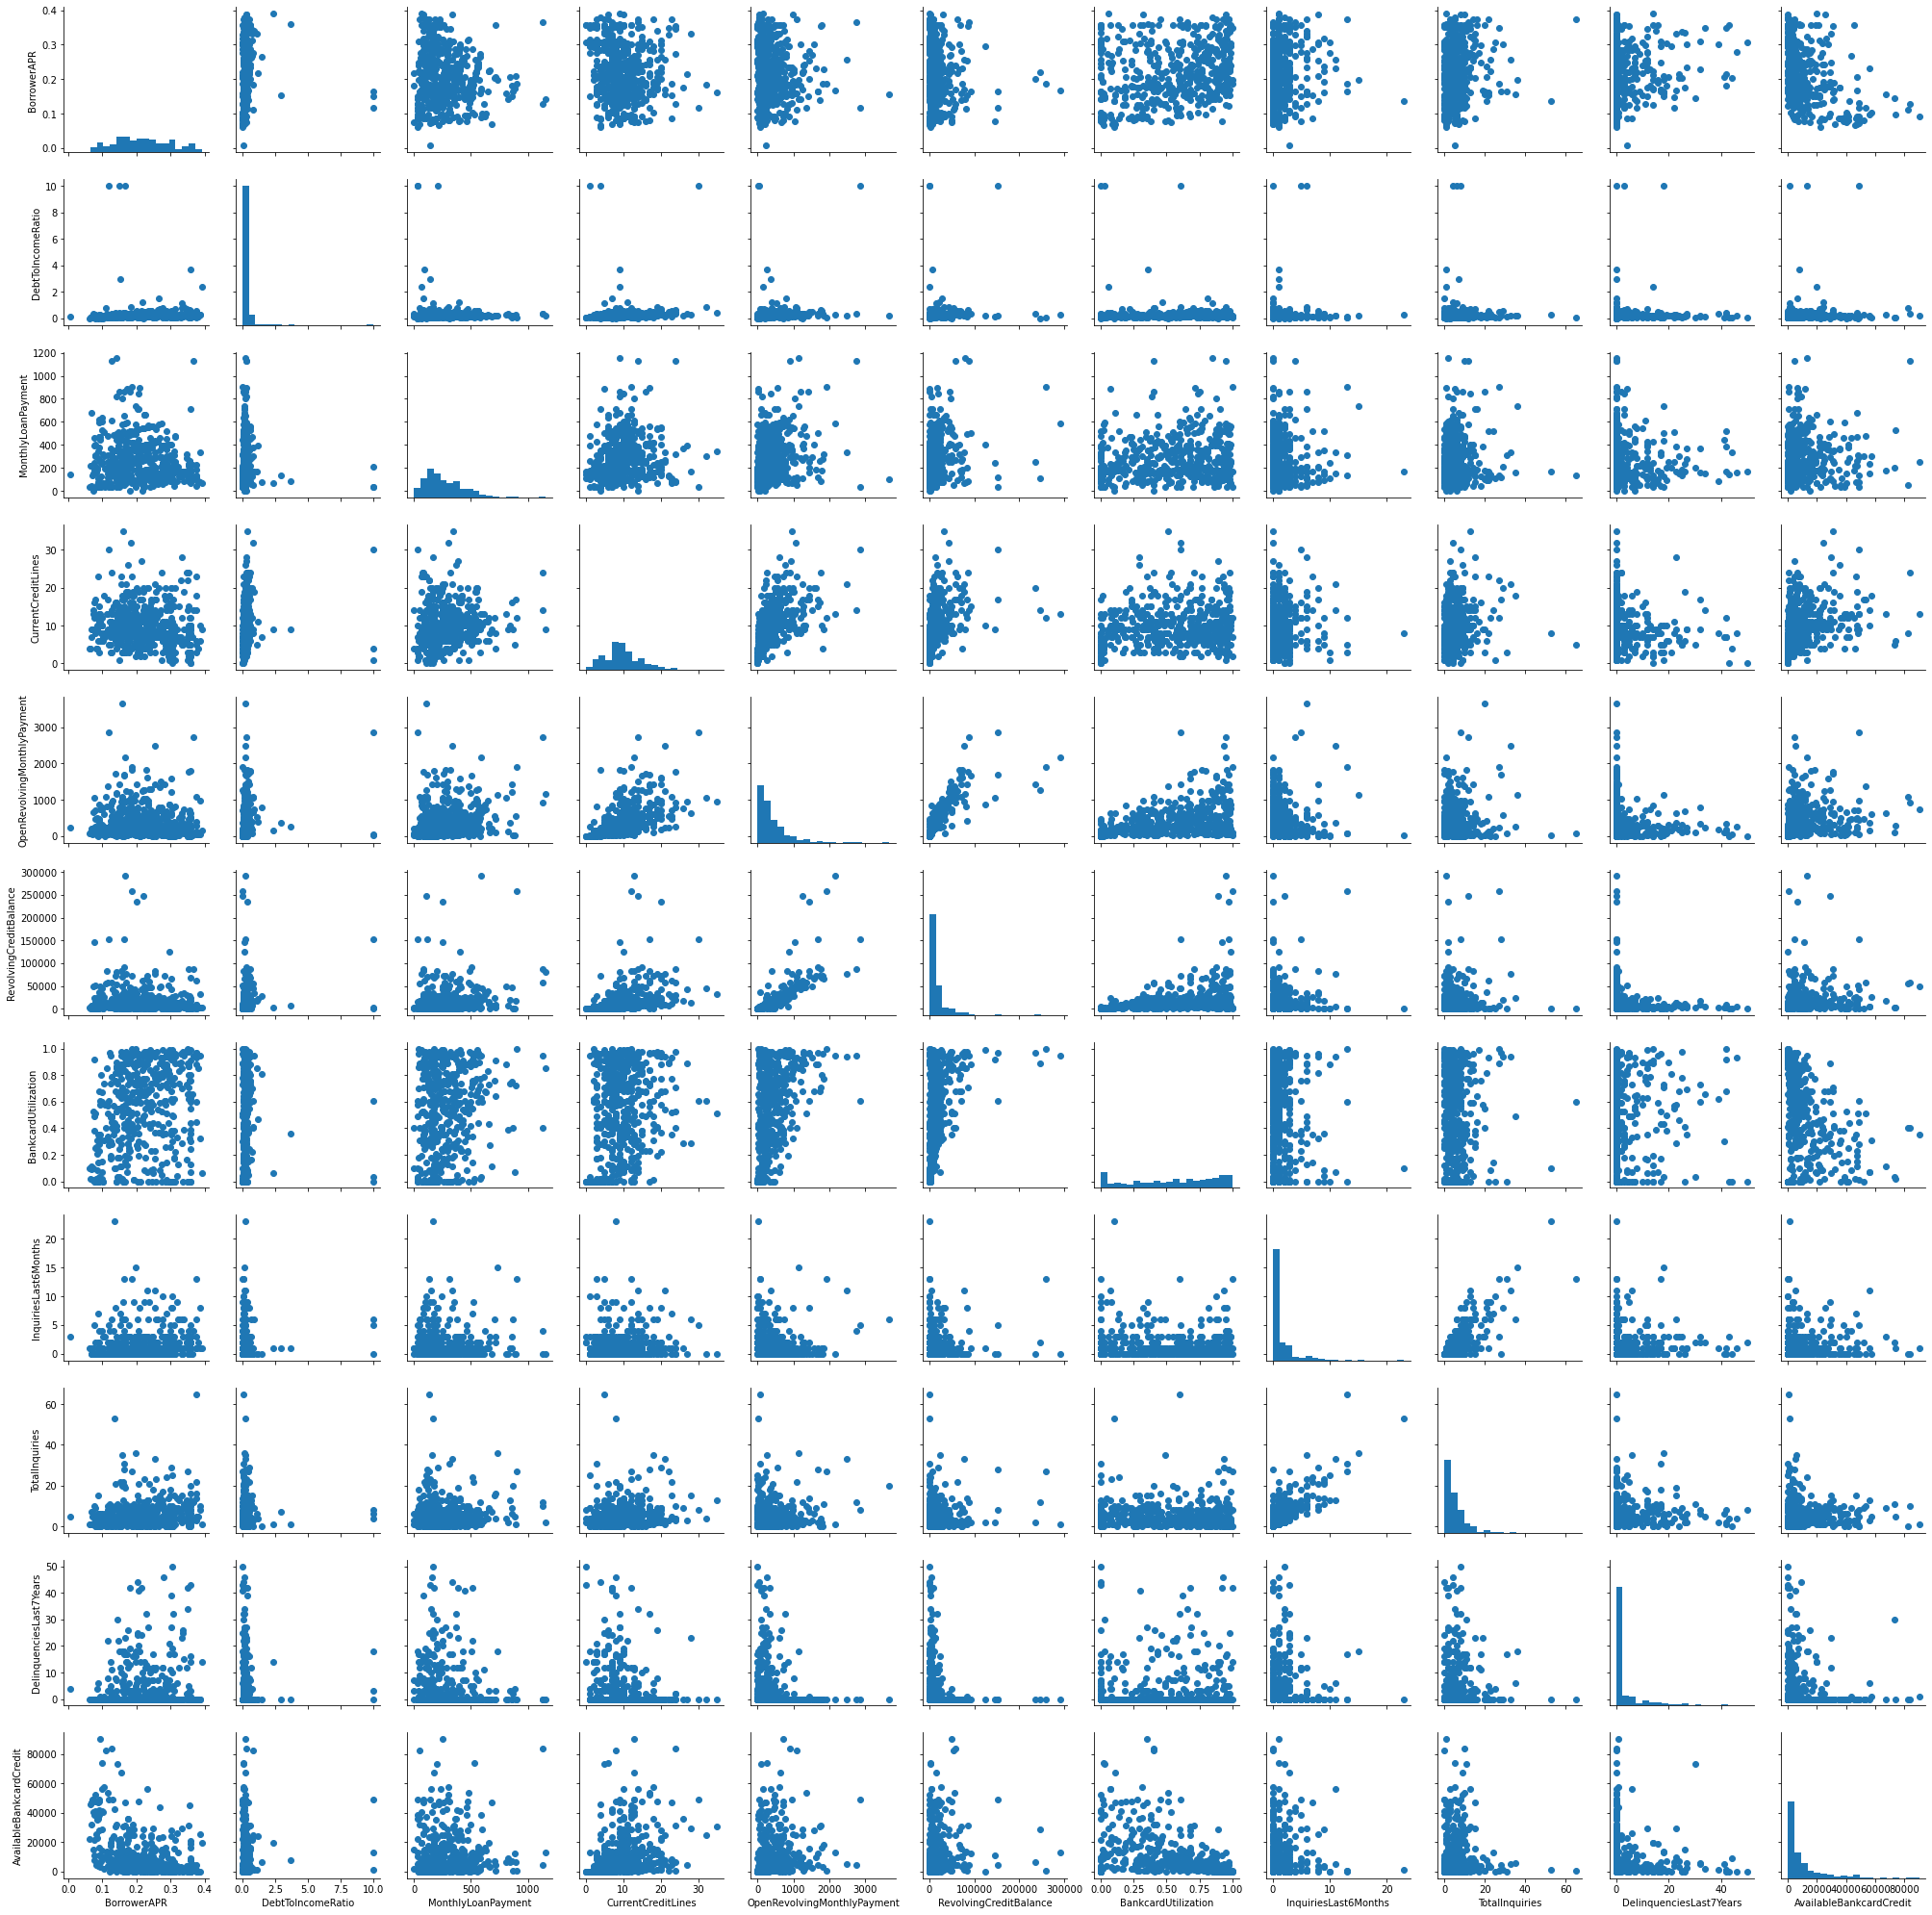

In [29]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(loan.shape[0], 500, replace = False)
loan_samp = loan.iloc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, `AvailableBankcardCredit` has a negtive relationship with `BorrowerAPR`. `OpenRevolvingMonthlyPayment` has a close relationship with `RevolvingCreditBalance` and `CurrentCreditLines`.

Let's move on to looking at how BorrowerAPR and LoanStatus correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

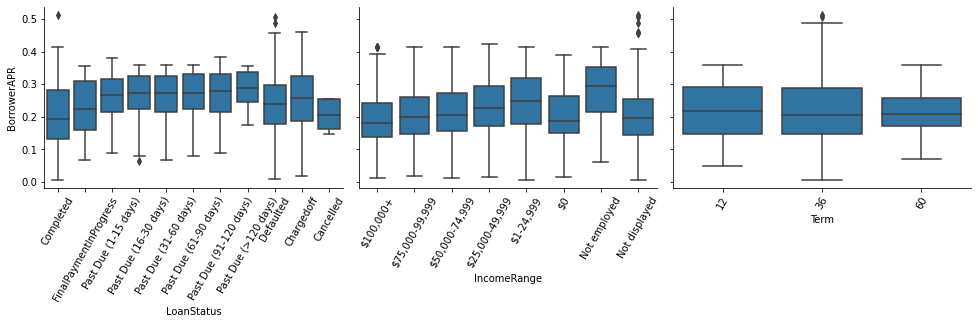

In [82]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=60)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR'], x_vars = categoric_vars, height=3,aspect = 1.5)
g.map(boxgrid)

plt.show();


Clearly, `IncomeRange` seems to be most relevant to the `BorrowerAPR`, with lower income, the APR goes up. Term has little effect on the APR. High APR loans are usually easier to be 'past due', which means APR represents risk level.

In [31]:
loan.LoanStatus.fillna('Cancelled',inplace=True)

In [32]:
loan.LoanStatus.describe()

count        111589
unique           11
top       Cancelled
freq          56286
Name: LoanStatus, dtype: object

In [33]:
loan['AvailableBankcardCredit'].fillna(1,inplace=True)

In [34]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x+1)
    else:
        return np.power(10, x+1)

loan['log_AvailableBankcardCredit'] = loan['AvailableBankcardCredit'].apply(log_trans)

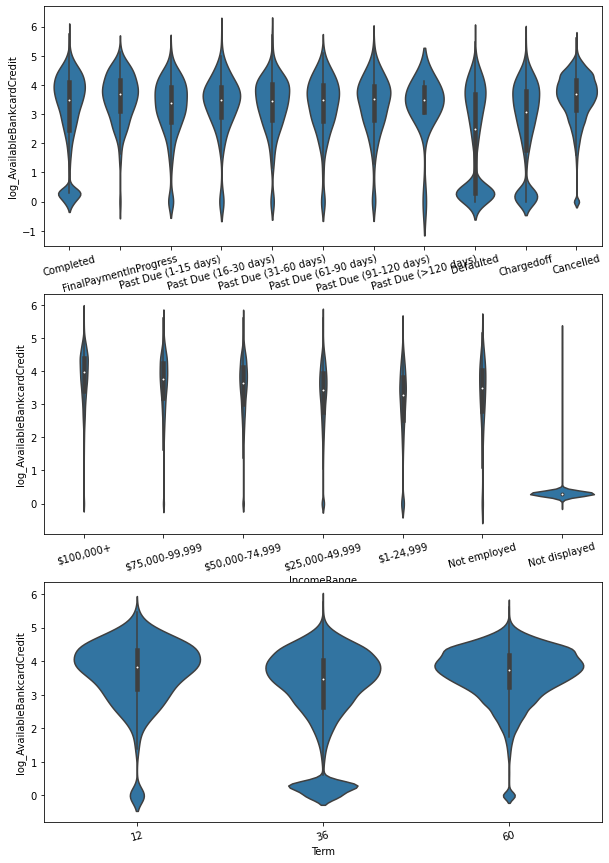

In [35]:
# AvailableBankcardCredit/MonthlyLoanPayment/BankcardUtilization and LoanStatus/IncomeRange/Term

fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loan, x = var, y = 'log_AvailableBankcardCredit', ax = ax[i],
               color = default_color)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(15)
    
    
plt.show()


The default/chargedoff ones have a average low AvailableBankcardCredit and even 0 credit left.

There's a declining trend of AvailableBankcardCredit when the income declines.

Terms seem to have little relationship with AvailableBankcardCredit.

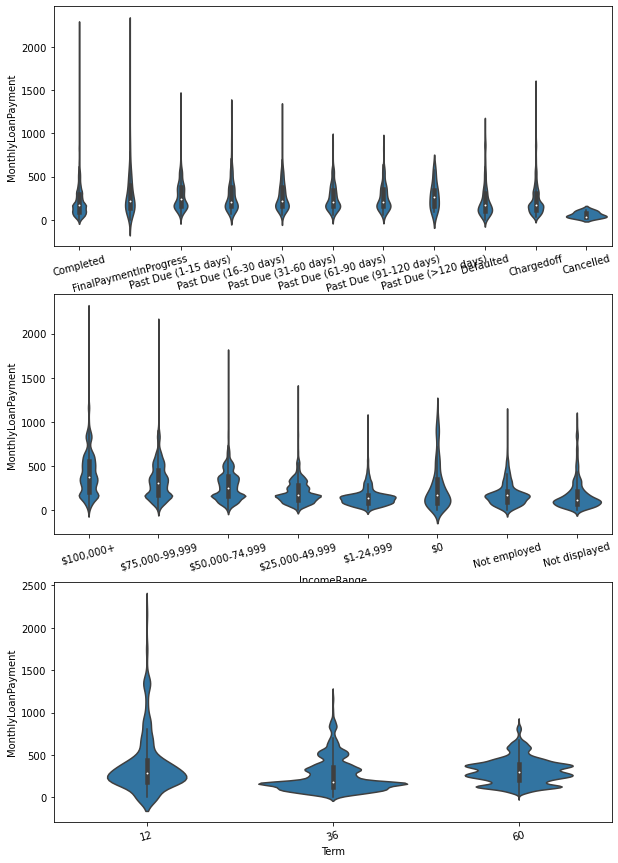

In [83]:
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loan, x = var, y = 'MonthlyLoanPayment', ax = ax[i],
               color = default_color)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(15)
    
    
plt.show()



There's a declining trend of MonthlyLoanPayment when the income declines, but not very significant.

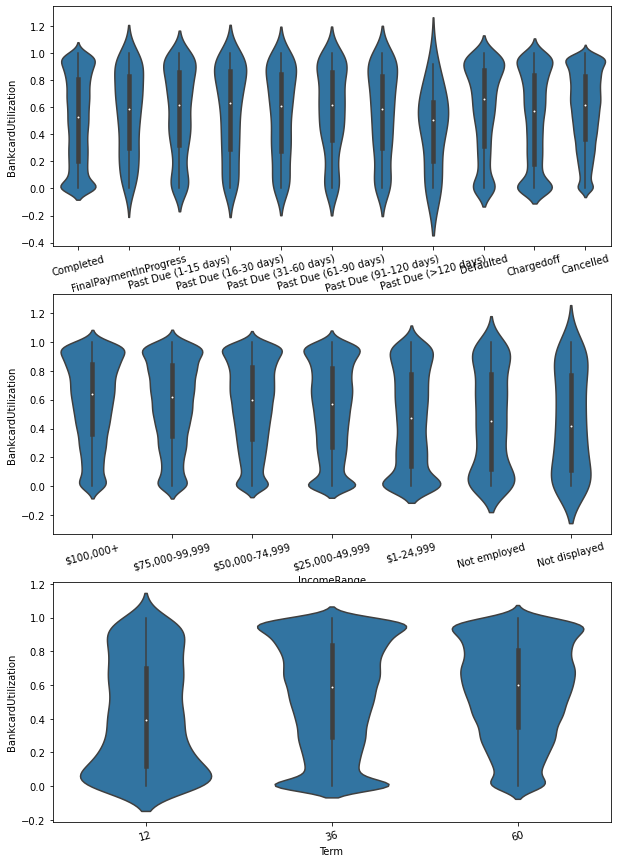

In [37]:
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loan, x = var, y = 'BankcardUtilization', ax = ax[i],
               color = default_color)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(15)
    
    
plt.show()



There's a declining trend of BankcardUtilization when the income declines, but not significant.

The long term(36,60) seems to have higher BankcardUtilization.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, `AvailableBankcardCredit` has a negtive relationship with `BorrowerAPR`. `OpenRevolvingMonthlyPayment` has a close relationship with `RevolvingCreditBalance` and `CurrentCreditLines`. Clearly, `IncomeRange` seems to be most relevant to the `BorrowerAPR`, with lower income, the APR goes up. Term has little effect on the APR. High APR loans are usually easier to be 'past due', which means APR represents risk level.

> The default/chargedoff ones have a average low `AvailableBankcardCredit` and even 0 credit left. There's a declining trend of AvailableBankcardCredit when the income declines. Terms seem to have little relationship with AvailableBankcardCredit.

> There's a declining trend of `MonthlyLoanPayment` when the income declines, but not very significant.

> There's a declining trend of `BankcardUtilization` when the income declines, but not significant. The long term(36,60) seems to have higher BankcardUtilization.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> `OpenRevolvingMonthlyPayment` has a significant positive relationship with `RevolvingCreditBalance`.

## Multivariate Exploration


The first thing is to see the relationship between APR and AvailableBankcardCredit under different income range.

In [38]:
loan['BorrowerAPR'].describe()
log_ticks = [0, 1, 2, 3, 4, 5, 6]

In [39]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(min(loan['log_AvailableBankcardCredit']), max(loan['log_AvailableBankcardCredit'])+0.01, 0.05)
    bins_y = np.arange(min(loan['BorrowerAPR']), max(loan['BorrowerAPR'])+0.01, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(np.array(log_ticks), log_ticks)
    plt.yticks(np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6]),
               [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6])

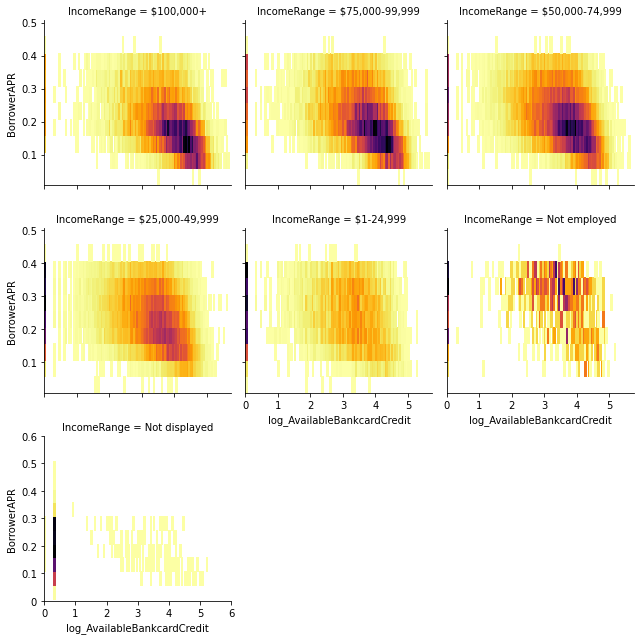

In [40]:
# create faceted heat maps on levels of the IncomeRange variable
g = sb.FacetGrid(data = loan, col = 'IncomeRange', col_wrap = 3, height = 3,
                 xlim = [0, 7])
g.map(hist2dgrid, 'log_AvailableBankcardCredit', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('log_AvailableBankcardCredit')
g.set_ylabels('BorrowerAPR')

plt.show()

For every income range, it's clear that higher available bank card credit usually has a lower APR. But the trend is the same on each income range, should there be any other factor that lead to high APR other than available bank card credit and income range? Let's look at monthly loan payment.

In [56]:
def hist2dgrid_3(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(min(loan['log_AvailableBankcardCredit']), max(loan['log_AvailableBankcardCredit'])+0.01, 0.05)
    
    plt.hist2d(x, y,  cmap = palette, cmin = 0.5)
    plt.yticks(np.array(log_ticks), log_ticks)
    

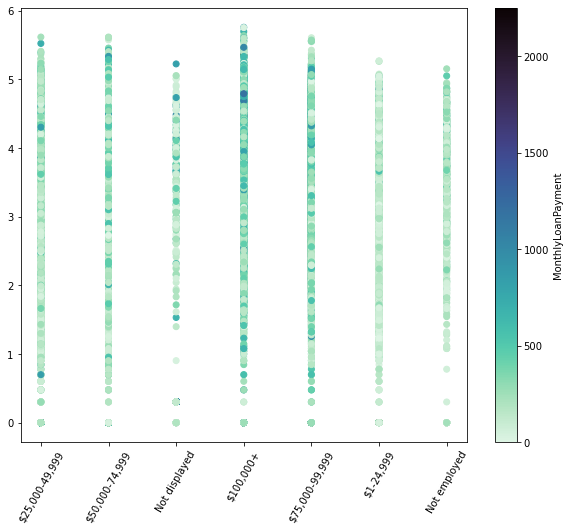

In [68]:
plt.figure(figsize=[10,8])
plt.scatter(data=loan,x='IncomeRange',y='log_AvailableBankcardCredit',c='MonthlyLoanPayment',cmap='mako_r')
plt.xticks(rotation=60)
plt.colorbar(label='MonthlyLoanPayment')


Looks like high income people usually have high monthly loan payment. That can explain why income range didn't affect the APR when available bank card credit is the same. If a hoursehold has a high income but high monthly loan payment, the bank won't give it a very low APR.

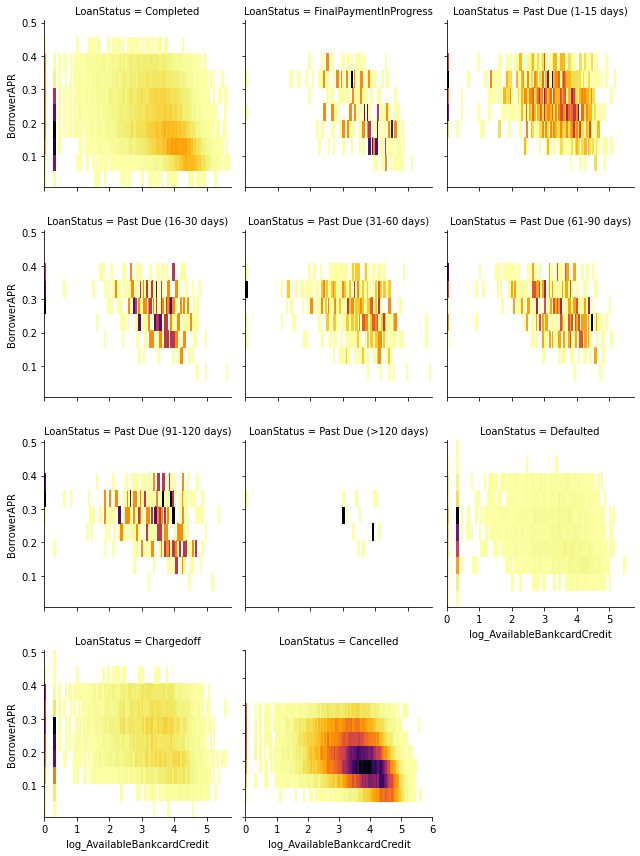

In [41]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, height = 3,
                 xlim = [0, 7])
g.map(hist2dgrid, 'log_AvailableBankcardCredit', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('log_AvailableBankcardCredit')
g.set_ylabels('BorrowerAPR')

plt.show()

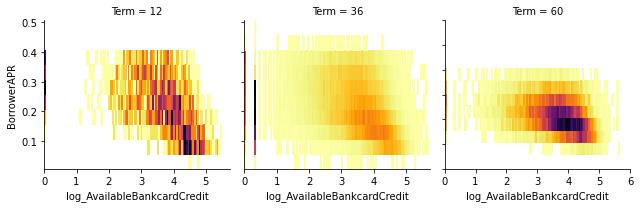

In [42]:
g = sb.FacetGrid(data = loan, col = 'Term', col_wrap = 3, height = 3,
                 xlim = [0, 7])
g.map(hist2dgrid, 'log_AvailableBankcardCredit', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('log_AvailableBankcardCredit')
g.set_ylabels('BorrowerAPR')

plt.show()


For 12 months loan, the APR is mix. There are a lot of borrowers who applied low APR and also there are a lot of them applied high APR. And it seems available bank card credit doesn't have a big influence on the change of APR for term=12.

But for term=36/60, the APR is lower and more relavant to available bank card credit. With high available bank card credit, the APR is lower.


In [43]:
ticks=[0,0.2,0.4,0.6,0.8,1,1.2]
def hist2dgrid_2(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(min(loan['BankcardUtilization']), max(loan['BankcardUtilization'])+0.01, 0.05)
    bins_y = np.arange(min(loan['BorrowerAPR']), max(loan['BorrowerAPR'])+0.01, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(ticks, ticks)
    plt.yticks(np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6]),
               [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6])

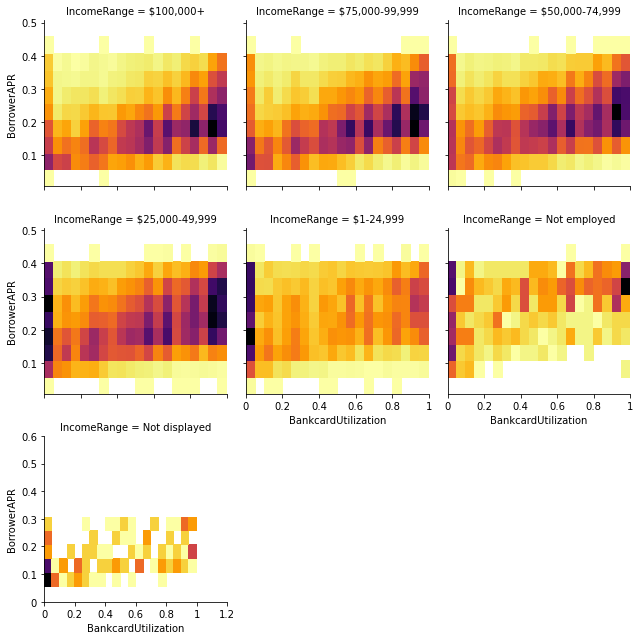

In [44]:
g = sb.FacetGrid(data = loan, col = 'IncomeRange', col_wrap = 3, height = 3,
                 xlim = [0, 7])
g.map(hist2dgrid_2, 'BankcardUtilization', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('BankcardUtilization')
g.set_ylabels('BorrowerAPR')

plt.show()


It's clear that with higher bank card utilization, APR goes high across all of the income range.

In [45]:
# select APR between 0.1-0.2(first peak)
loan_flag = (loan['BorrowerAPR'] > 0.1) & (loan['BorrowerAPR'] <= 0.2)
loan_1c = loan.loc[loan_flag,:]

In [46]:
# select APR between 0.3-0.4(Second peak)
loan_flag2 = (loan['BorrowerAPR'] > 0.3) & (loan['BorrowerAPR'] <= 0.4)
loan_2c = loan.loc[loan_flag2,:]

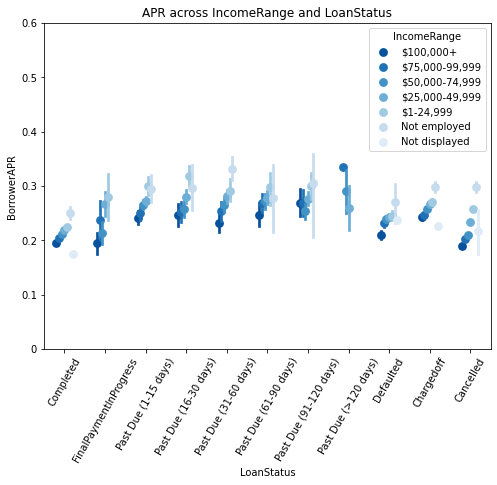

In [47]:
# full data plot
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IncomeRange',
           palette = 'Blues_r', linestyles = '', dodge = 0.4)
plt.title('APR across IncomeRange and LoanStatus')
plt.ylabel('BorrowerAPR')

plt.yticks(np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6]), [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=60)
plt.show();


As is shown above, for most of loan status, higher income has lower borrowerAPR.

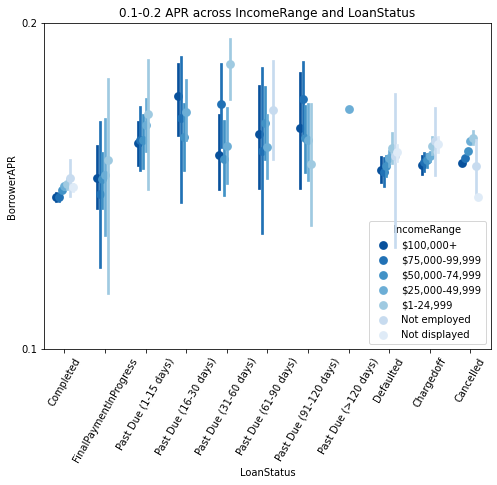

In [48]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_1c, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IncomeRange',
           palette = 'Blues_r', linestyles = '', dodge = 0.4)
plt.title('0.1-0.2 APR across IncomeRange and LoanStatus')
plt.ylabel('BorrowerAPR')

plt.yticks(np.array([0.1, 0.2]), [0.1, 0.2])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=60)
plt.show();


Low APR range doesn't show a clear trend that higher income has lower borrowerAPR.

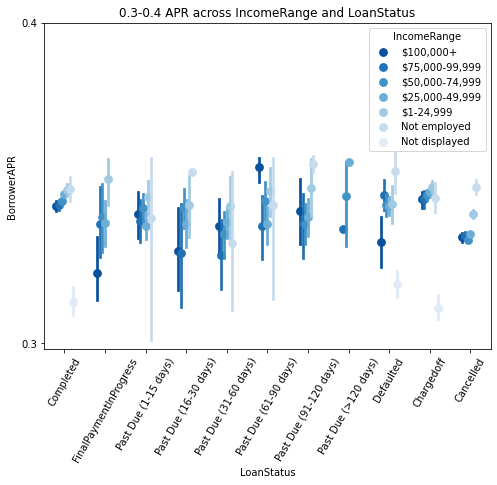

In [49]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_2c, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IncomeRange',
           palette = 'Blues_r', linestyles = '', dodge = 0.4)
plt.title('0.3-0.4 APR across IncomeRange and LoanStatus')
plt.ylabel('BorrowerAPR')

plt.yticks(np.array([0.3, 0.4]), [0.3, 0.4])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=60)
plt.show();


High APR range show a clear trend that higher income has lower borrowerAPR.

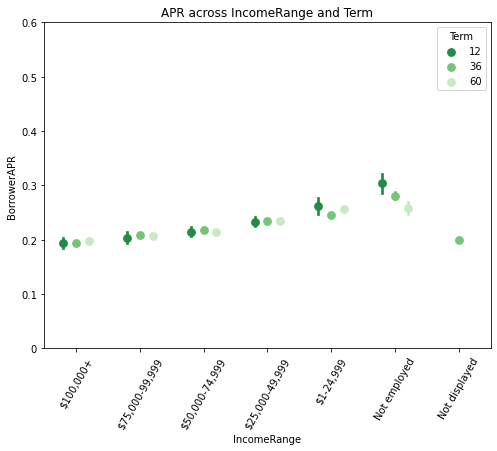

In [479]:
# Term
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens_r', linestyles = '', dodge = 0.4)
plt.title('APR across IncomeRange and Term')
plt.ylabel('BorrowerAPR')

plt.yticks(np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6]), [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=60)
plt.show();


In terms of high income range, the BorrowerAPR didn't change much across different terms. But for low income range, shorter term tend to have higher APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For every income range, it's clear that higher available bank card credit usually has a lower APR.

> For 12 months loan, the APR is mix. There are a lot of borrowers who applied low APR and also there are a lot of them applied high APR. And it seems available bank card credit doesn't have a big influence on the change of APR for term=12. But for term=36/60, the APR is lower and more relavant to available bank card credit. With high available bank card credit, the APR is lower.

> It's clear that with higher bank card utilization, APR goes high across all of the income range.

> As is shown above, for most of loan status, higher income has lower borrowerAPR.

> Low APR range doesn't show a clear trend that higher income has lower borrowerAPR.

> High APR range show a clear trend that higher income has lower borrowerAPR.

> In terms of high income range, the BorrowerAPR didn't change much across different terms. But for low income range, shorter term tend to have higher APR.

### Were there any interesting or surprising interactions between features?

> It's interesting to see how term affects APR. Longer term tend to have a lower APR and available bank card credit makes a difference. Also, the most critical factor deciding APR is income range, which is understandable, high income can represent less risk. But for income > 25,000, the APR difference is not very obvious and available bank card credit plays a big role. Based on the observation of relationship between income range and Monthly loan payment, high income tend to have high monthly loan payment. Then if we dig deeper and plot income range, Monthly loan payment and available bank card credit, we could see high income people usually have high monthly loan payment. That can explain why income range didn't affect the APR when available bank card credit is the same. If a hoursehold has a high income but high monthly loan payment, the bank won't give it a very low APR.